<a href="https://colab.research.google.com/github/woodword-0/ML-Algorithms/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats
import seaborn as sns; sns.set_theme()
missing_values = ['NA','n/a',"",'','N/A','None','none','NONE','n.a.','?','Nan','nan','NaN']
df = pd.read_csv('/content/raw_house_data.csv', na_values = missing_values)

#replace all instances of "None" with zero
#df = df.replace("None", 0)
#Columns with missing values
nan_col = []
for col in df.head():
    nan = df[col].isnull().values.any()
    if nan == True:
        nan_col.append(col)
print(nan_col)
#replace all instances of "None" with zero
#df1 = df.replace("missing_values", 0)

['lot_acres', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'floor_covering', 'HOA']


In [3]:
df.to_numpy()

array([[21530491, 5300000.0, 85637, ..., '6', 'Mexican Tile, Wood', '0'],
       [21529082, 4200000.0, 85646, ..., '5', 'Natural Stone, Other',
        '0'],
       [3054672, 4200000.0, 85646, ..., '5',
        'Natural Stone, Other: Rock', nan],
       ...,
       [21832452, 475000.0, 85192, ..., '0', 'Ceramic Tile', nan],
       [21900515, 550000.0, 85745, ..., '1', 'Carpet, Ceramic Tile', nan],
       [4111490, 450000.0, 85621, ..., '3', 'Carpet, Mexican Tile', nan]],
      dtype=object)



```
# This is formatted as code
```

Cleaning Data

In [4]:
#Drop Nan in Column
df = df[df['floor_covering'].notna()]
#Frequency encoding value counts to replace kitchen features
df['floor_covering'] = df['floor_covering'].map(df['floor_covering'].value_counts())

In [5]:

#Drop Nan in Column
df = df[df['kitchen_features'].notna()]
#Frequency encoding value counts to replace kitchen features
df['kitchen_features'] = df['kitchen_features'].map(df['kitchen_features'].value_counts())

In [6]:
#Fill in missing values with 0
df['bathrooms'] = df['bathrooms'].fillna(0)
df['garage'] = df['garage'].fillna(0)
df['HOA'] = df['HOA'].fillna(0)

In [7]:
#Fill in by the mean
df['sqrt_ft'] = df['sqrt_ft'].fillna(df['sqrt_ft'].mean())
df['lot_acres'] = df['lot_acres'].fillna(df['lot_acres'].mean())

In [8]:
df.drop(df[df['latitude'] > 33].index, inplace = True)
df.drop(df[df['longitude'] < -112].index, inplace = True)
df.drop(df[df['longitude'] > -110].index, inplace = True)

In [9]:
#Columns with missing values
nan_col = []
for col in df.head():
    nan = df[col].isnull().values.any()
    if nan == True:
        nan_col.append(col)
print(nan_col)

[]




```
`# This is formatted as code`
```

Feature Engineering

In [10]:
#Calculating Distances
A = []
for i in df['latitude'].index:
  A.append((np.sqrt((df['latitude'].mean() - df['latitude'][i])**2 + (df['longitude'].mean() - df['longitude'][i])**2)))

In [11]:
#Assigning a distances column to the dataframe
df = df.assign(distances = A)


In [12]:
#bining the distances
bin_labels_5 = ['1','2','3','4','5']
pd.cut(df['distances'], bins=5)

0          (0.907, 1.133]
1           (0.68, 0.907]
2           (0.68, 0.907]
3           (0.454, 0.68]
4       (4.64e-05, 0.228]
              ...        
4995        (0.454, 0.68]
4996    (4.64e-05, 0.228]
4997        (0.454, 0.68]
4998    (4.64e-05, 0.228]
4999       (0.907, 1.133]
Name: distances, Length: 4954, dtype: category
Categories (5, interval[float64]): [(4.64e-05, 0.228] < (0.228, 0.454] < (0.454, 0.68] < (0.68, 0.907] <
                                    (0.907, 1.133]]

In [13]:
#Using the bins to bin location
df1 = df.loc[df['distances'] > 0.23, 'latitude']
df2 = df.loc[df['distances'] > 0.23, 'longitude']
df3 = df.loc[df['distances'] > 0.45, 'latitude']
df4 = df.loc[df['distances'] > 0.45, 'longitude']
df5 = df.loc[df['distances'] > 0.68, 'latitude']
df6 = df.loc[df['distances'] > 0.68, 'longitude']
df7 = df.loc[df['distances'] > 0.91, 'latitude']
df8 = df.loc[df['distances'] > 0.91, 'longitude']
# df9 = df.loc[df['distances'] > 0.79, 'latitude']
# df10 = df.loc[df['distances'] > 0.79, 'longitude']
# df11 = df.loc[df['distances'] > 0.91, 'latitude']
# df12 = df.loc[df['distances'] > 0.91, 'longitude']
# df13 = df.loc[df['distances'] > 1, 'latitude']
# df14 = df.loc[df['distances'] > 1, 'longitude']
# df15 = df.loc[df['distances'] > 0.57, 'latitude']
# df16 = df.loc[df['distances'] > 0.57, 'longitude']
# df17 = df.loc[df['distances'] > 0.68, 'latitude']
# df18 = df.loc[df['distances'] > 0.68, 'longitude']

In [14]:
#categorizing the tax bin by government income bracket
bin_labels_7 = ['1','2','3','4','5','6','7']
bins = [0,9875,40125,85525,163300,207350,518400, max(df['taxes'])]
tax_bins = pd.cut(df['taxes'], bins=7, labels = bin_labels_7)
df = df.assign(tax_bracket = tax_bins)
bin_labels_5 = ['1','2','3','4','5']
df['distances'] = pd.cut(df['distances'], bins = 5, labels = bin_labels_5)

In [15]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,distances,tax_bracket
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.000000,0.0,2,6,29,0,5,1
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.000000,0.0,21,5,4,0,4,1
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3709.263559,0.0,68,5,1,0,4,1
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.000000,4.0,1,4,3,0,3,1
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.000000,3.0,1719,5,87,55,1,1


In [16]:
(min(df['taxes']), max(df['taxes']))

(0.0, 12215075.0)

In [17]:
#Returns a list of tax brackets for each location
locator1 = df.loc[df['distances'] == '1','tax_bracket']
locator2 = df.loc[df['distances'] == '2','tax_bracket']
locator3 = df.loc[df['distances'] == '3','tax_bracket']
locator4 = df.loc[df['distances'] == '4','tax_bracket']
locator5 = df.loc[df['distances'] == '5','tax_bracket']
# locator6 = df.loc[df['distances'] == '6','tax_bracket']
# locator7 = df.loc[df['distances'] == '7','tax_bracket']
# locator8 = df.loc[df['distances'] == '8','tax_bracket']
# locator9 = df.loc[df['distances'] == '9','tax_bracket']
# locator10 = df.loc[df['distances'] == '10','tax_bracket']

In [18]:
#Adds columns
df = df.assign(bracket_1 = locator1) #For i = 1,2,3,4,5 column contains all tax brackets for that i.
df = df.assign(bracket_2 = locator2)
df = df.assign(bracket_3 = locator3)
df = df.assign(bracket_4 = locator4)
df = df.assign(bracket_5 = locator5)
# df = df.assign(bracket_6 = locator6) #For i = 1,2,3,4,5 column contains all tax brackets for that i.
# df = df.assign(bracket_7 = locator7)
# df = df.assign(bracket_8 = locator8)
# df = df.assign(bracket_9 = locator9)
# df = df.assign(bracket_10 = locator10)

In [19]:
#Add empty category zero for imputing
df['bracket_1'] = df['bracket_1'].cat.add_categories(0)
df['bracket_2'] = df['bracket_2'].cat.add_categories(0)
df['bracket_3'] = df['bracket_3'].cat.add_categories(0)
df['bracket_4'] = df['bracket_4'].cat.add_categories(0)
df['bracket_5'] = df['bracket_5'].cat.add_categories(0)
# df['bracket_6'] = df['bracket_6'].cat.add_categories(0)
# df['bracket_7'] = df['bracket_7'].cat.add_categories(0)
# df['bracket_8'] = df['bracket_8'].cat.add_categories(0)
# df['bracket_9'] = df['bracket_9'].cat.add_categories(0)
# df['bracket_10'] = df['bracket_10'].cat.add_categories(0)

In [20]:
#Change to float or int
df['distances'] = df['distances'].astype('int')
df['bracket_1'] = df['bracket_1'].fillna(0).astype('int')
df['bracket_2'] = df['bracket_2'].fillna(0).astype('int')
df['bracket_3'] = df['bracket_3'].fillna(0).astype('int')
df['bracket_4'] = df['bracket_4'].fillna(0).astype('int')
df['bracket_5'] = df['bracket_5'].fillna(0).astype('int')
df['distances'] = df['distances'].astype('int')
# df['bracket_6'] = df['bracket_6'].fillna(0).astype('int')
# df['bracket_7'] = df['bracket_7'].fillna(0).astype('int')
# df['bracket_8'] = df['bracket_8'].fillna(0).astype('int')
# df['bracket_9'] = df['bracket_9'].fillna(0).astype('int')
# df['bracket_10'] = df['bracket_10'].fillna(0).astype('int')
df['tax_bracket'] = df['tax_bracket'].astype('int')

In [21]:
#Replaces value with appropriate taxbracket by location
df.loc[df['bracket_1'] == 1, 'distances'] = 11
df.loc[df['bracket_1'] == 2, 'distances'] = 12
df.loc[df['bracket_1'] == 3, 'distances'] = 13
df.loc[df['bracket_1'] == 4, 'distances'] = 14
df.loc[df['bracket_1'] == 5, 'distances'] = 15
# df.loc[df['bracket_1'] == 6, 'distances'] = 16
# df.loc[df['bracket_1'] == 7, 'distances'] = 17
# df.loc[df['bracket_1'] == 8, 'distances'] = 18
# df.loc[df['bracket_1'] == 9, 'distances'] = 19
# df.loc[df['bracket_1'] == 10, 'distances'] = 110

In [22]:
df.loc[df['bracket_2'] == 1, 'distances'] = 21
df.loc[df['bracket_2'] == 2, 'distances'] = 22
df.loc[df['bracket_2'] == 3, 'distances'] = 23
df.loc[df['bracket_2'] == 4, 'distances'] = 24
df.loc[df['bracket_2'] == 5, 'distances'] = 25
# df.loc[df['bracket_2'] == 6, 'distances'] = 26
# df.loc[df['bracket_2'] == 7, 'distances'] = 27

In [23]:
df.loc[df['bracket_3'] == 1, 'distances'] = 31
df.loc[df['bracket_3'] == 2, 'distances'] = 32
df.loc[df['bracket_3'] == 3, 'distances'] = 33
df.loc[df['bracket_3'] == 4, 'distances'] = 34
df.loc[df['bracket_3'] == 5, 'distances'] = 35
# df.loc[df['bracket_3'] == 6, 'distances'] = 36
# df.loc[df['bracket_3'] == 7, 'distances'] = 37

In [24]:
df.loc[df['bracket_4'] == 1, 'distances'] = 41
df.loc[df['bracket_4'] == 2, 'distances'] = 42
df.loc[df['bracket_4'] == 3, 'distances'] = 43
df.loc[df['bracket_4'] == 4, 'distances'] = 44
df.loc[df['bracket_4'] == 5, 'distances'] = 45
# # df.loc[df['bracket_4'] == 6, 'distances'] = 46
# # df.loc[df['bracket_4'] == 7, 'distances'] = 47

In [25]:
df.loc[df['bracket_5'] == 1, 'distances'] = 51
df.loc[df['bracket_5'] == 2, 'distances'] = 52
df.loc[df['bracket_5'] == 3, 'distances'] = 53
df.loc[df['bracket_5'] == 4, 'distances'] = 54
df.loc[df['bracket_5'] == 5, 'distances'] = 55
# df.loc[df['bracket_5'] == 6, 'distances'] = 56
# df.loc[df['bracket_5'] == 7, 'distances'] = 57

In [26]:
# df.loc[df['bracket_6'] == 1, 'distances'] = 61
# df.loc[df['bracket_6'] == 2, 'distances'] = 62
# df.loc[df['bracket_6'] == 3, 'distances'] = 63
# df.loc[df['bracket_6'] == 4, 'distances'] = 64
# df.loc[df['bracket_6'] == 5, 'distances'] = 65

In [27]:
# df.loc[df['bracket_7'] == 1, 'distances'] = 71
# df.loc[df['bracket_7'] == 2, 'distances'] = 72
# df.loc[df['bracket_7'] == 3, 'distances'] = 73
# df.loc[df['bracket_7'] == 4, 'distances'] = 74
# df.loc[df['bracket_7'] == 5, 'distances'] = 75

In [28]:
# df.loc[df['bracket_8'] == 1, 'distances'] = 81
# df.loc[df['bracket_8'] == 2, 'distances'] = 82
# df.loc[df['bracket_8'] == 3, 'distances'] = 83
# df.loc[df['bracket_8'] == 4, 'distances'] = 84
# df.loc[df['bracket_8'] == 5, 'distances'] = 85

In [29]:
# df.loc[df['bracket_9'] == 1, 'distances'] = 91
# df.loc[df['bracket_9'] == 2, 'distances'] = 92
# df.loc[df['bracket_9'] == 3, 'distances'] = 93
# df.loc[df['bracket_9'] == 4, 'distances'] = 94
# df.loc[df['bracket_9'] == 5, 'distances'] = 95

In [30]:
# df.loc[df['bracket_10'] == 1, 'distances'] = 101
# df.loc[df['bracket_10'] == 2, 'distances'] = 102
# df.loc[df['bracket_10'] == 3, 'distances'] = 103
# df.loc[df['bracket_10'] == 4, 'distances'] = 104
# df.loc[df['bracket_10'] == 5, 'distances'] = 105

In [31]:
#Columns with missing values
nan_col = []
for col in df.head():
    nan = df[col].isnull().values.any()
    if nan == True:
        nan_col.append(col)
print(nan_col)

[]


Normalizing

In [32]:
df['sold_price'] = df.apply(lambda x: x['sold_price']/x['sqrt_ft'], axis=1)

In [33]:
df['year_built'] = 2021 - df['year_built']
df['MLS']=(df['MLS']-df['MLS'].min())/(df['MLS'].max()-df['MLS'].min())
df['zipcode']=(df['zipcode']-df['zipcode'].min())/(df['zipcode'].max()-df['zipcode'].min())
df['sold_price']=(df['sold_price']-df['sold_price'].min())/(df['sold_price'].max()-df['sold_price'].min())
df['latitude']=(df['latitude']-df['latitude'].min())/(df['latitude'].max()-df['latitude'].min())
df['longitude']=(df['longitude']-df['longitude'].min())/(df['longitude'].max()-df['longitude'].min())
df['taxes']=(df['taxes']-df['taxes'].min())/(df['taxes'].max()-df['taxes'].min())
df['year_built']=(df['year_built']-df['year_built'].min())/(df['year_built'].max()-df['year_built'].min())
df['bedrooms']=(df['bedrooms']-df['bedrooms'].min())/(df['bedrooms'].max()-df['bedrooms'].min())
df['bathrooms']=(df['bathrooms']-df['bathrooms'].min())/(df['bathrooms'].max()-df['bathrooms'].min())
df['garage']=(df['garage']-df['garage'].min())/(df['garage'].max()-df['garage'].min())
df['kitchen_features']=(df['kitchen_features']-df['kitchen_features'].min())/(df['kitchen_features'].max()-df['kitchen_features'].min())
df['floor_covering']=(df['floor_covering']-df['floor_covering'].min())/(df['floor_covering'].max()-df['floor_covering'].min())
df['tax_bracket']=(df['tax_bracket']-df['tax_bracket'].min())/(df['tax_bracket'].max()-df['tax_bracket'].min())
df['bracket_1']=(df['bracket_1']-df['bracket_1'].min())/(df['bracket_1'].max()-df['bracket_1'].min())
df['bracket_2']=(df['bracket_2']-df['bracket_2'].min())/(df['bracket_2'].max()-df['bracket_2'].min())
df['bracket_3']=(df['bracket_3']-df['bracket_3'].min())/(df['bracket_3'].max()-df['bracket_3'].min())
df['bracket_4']=(df['bracket_4']-df['bracket_4'].min())/(df['bracket_4'].max()-df['bracket_4'].min())
df['bracket_5']=(df['bracket_5']-df['bracket_5'].min())/(df['bracket_5'].max()-df['bracket_5'].min())

In [34]:
X = df
df.sample(frac=1)
X.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,distances,tax_bracket,bracket_1,bracket_2,bracket_3,bracket_4,bracket_5
0,0.978922,0.405661,0.790409,0.735593,0.000000,2154.00,0.000432,0.038633,0.342857,0.277778,10500.000000,0.000000,0.000582,6,0.022690,0,51,0.0,0.000000,0.0,0.0,0.0,1.0
1,0.978847,0.465284,0.806394,0.202998,0.147885,1707.00,0.000853,0.010896,0.028571,0.055556,7300.000000,0.000000,0.011641,5,0.002431,0,41,0.0,0.000000,0.0,0.0,1.0,0.0
2,0.000626,0.935771,0.806394,0.206721,0.148278,1707.00,0.000858,0.010896,0.028571,0.083333,3709.263559,0.000000,0.038999,5,0.000000,0,41,0.0,0.000000,0.0,0.0,1.0,0.0
3,0.999511,0.400749,0.806394,0.210539,0.180009,636.67,0.000689,0.044081,0.171429,0.138889,9019.000000,0.133333,0.000000,4,0.001621,0,31,0.0,0.000000,0.0,1.0,0.0,0.0
4,0.967054,0.429830,0.991119,0.387884,0.577488,3.21,0.001260,0.011887,0.085714,0.166667,6396.000000,0.100000,1.000000,5,0.069692,55,11,0.0,0.142857,0.0,0.0,0.0,0.0


In [35]:
df1 = df[['distances','longitude', 'latitude']].copy()

In [36]:
X1_train = df1.iloc[:3963,1:].to_numpy()
y1_train = df1.iloc[:3963,0].to_numpy()
X1_test =  df1.iloc[3963:4458,1:].to_numpy()
y1_test = df1.iloc[3963:4458,0].to_numpy()
X1_validate =  df1.iloc[4458:4954,1:].to_numpy()
y1_validate = df1.iloc[4458:4954,0].to_numpy()

In [37]:
df2 = df[['sold_price','distances','bedrooms','bathrooms','sqrt_ft','lot_acres','year_built','zipcode','garage']].copy()

In [38]:
df2

,sold_price,distances,bedrooms,bathrooms,sqrt_ft,lot_acres,year_built,zipcode,garage
0,0.405661,51,0.342857,0.277778,10500.000000,2154.00,0.038633,0.790409,0.000000
1,0.465284,41,0.028571,0.055556,7300.000000,1707.00,0.010896,0.806394,0.000000
2,0.935771,41,0.028571,0.083333,3709.263559,1707.00,0.010896,0.806394,0.000000
3,0.400749,31,0.171429,0.138889,9019.000000,636.67,0.044081,0.806394,0.133333
4,0.429830,11,0.085714,0.166667,6396.000000,3.21,0.011887,0.991119,0.100000
...,...,...,...,...,...,...,...,...,...
4995,0.095386,31,0.114286,0.083333,3601.000000,4.98,0.006934,0.797513,0.100000
4996,0.179702,11,0.085714,0.083333,2318.000000,1.42,0.014364,0.991119,0.100000
4997,0.205707,31,0.057143,0.055556,1772.000000,12.06,0.024765,0.000000,0.000000
4998,0.104027,11,0.085714,0.111111,3724.000000,1.01,0.004953,0.982238,0.100000


In [39]:
q1 = df2.zipcode.quantile(0.05)
def app(x):
  if x < q1:
    return q1
  else:
    return x
q2 = df2.zipcode.quantile(0.95)
def app1(x):
  if x > q2:
    return q2
  else:
    return x
df2["zipcode"] = df2.zipcode.apply(app)
df2["zipcode"] = df2.zipcode.apply(app1)
v1 = df2.year_built.quantile(0.05)
def cut(x):
  if x < v1:
    return v1
  else:
    return x
v2 = df2.year_built.quantile(0.95)
def cut1(x):
  if x > v2:
    return v2
  else:
    return x
df2["year_built"] = df2.year_built.apply(cut)
df2["year_built"] = df2.year_built.apply(cut1)

In [40]:
q1 = df2.sold_price.quantile(0.05)
def app(x):
  if x < q1:
    return q1
  else:
    return x
q2 = df2.sold_price.quantile(0.95)
def app1(x):
  if x > q2:
    return q2
  else:
    return x
df2["sold_price"] = df2.sold_price.apply(app)
df2["sold_price"] = df2.sold_price.apply(app1)

In [41]:
q1 = df2.garage.quantile(0.05)
def app(x):
  if x < q1:
    return q1
  else:
    return x
q2 = df2.garage.quantile(0.95)
def app1(x):
  if x > q2:
    return q2
  else:
    return x
df2["garage"] = df2.garage.apply(app)
df2["garage"] = df2.garage.apply(app1)
# v1 = df2.HOA.quantile(0.05)
# def cut(x):
#   if x < v1:
#     return v1
#   else:
#     return x
# v2 = df2.HOA.quantile(0.95)
# def cut1(x):
#   if x > v2:
#     return v2
#   else:
#     return x
# df2["HOA"] = df2.HOA.apply(cut)
# df2["HOA"] = df2.HOA.apply(cut1)

In [42]:
q1 = df2.sqrt_ft.quantile(0.05)
def app(x):
  if x < q1:
    return q1
  else:
    return x
q2 = df2.sqrt_ft.quantile(0.95)
def app1(x):
  if x > q2:
    return q2
  else:
    return x
df2["sqrt_ft"] = df2.sqrt_ft.apply(app)
df2["sqrt_ft"] = df2.sqrt_ft.apply(app1)
v1 = df2.lot_acres.quantile(0.05)
def cut(x):
  if x < v1:
    return v1
  else:
    return x
v2 = df2.lot_acres.quantile(0.95)
def cut1(x):
  if x > v2:
    return v2
  else:
    return x
df2["lot_acres"] = df2.lot_acres.apply(cut)
df2["lot_acres"] = df2.lot_acres.apply(cut1)

In [43]:
b1 = df.bedrooms.quantile(0.05)
def bed(x):
  if x < b1:
    return b1
  else:
    return x
df["bedrooms"] = df.bedrooms.apply(bed)
b2 = df.bedrooms.quantile(0.95)
def bed1(x):
  if x > b2:
    return b2
  else:
    return x
df["bedrooms"] = df.bedrooms.apply(bed)
df["bedrooms"] = df.bedrooms.apply(bed1)

In [44]:
c1 = df.bathrooms.quantile(0.05)
def bath(x):
  if x < c1:
    return c1
  else:
    return x
c2 = df.bathrooms.quantile(0.95)
def bath1(x):
  if x > c2:
    return c2
  else:
    return x
df["bathrooms"] = df.bathrooms.apply(bath)
df["bathrooms"] = df.bathrooms.apply(bath1)

In [45]:
df2

,sold_price,distances,bedrooms,bathrooms,sqrt_ft,lot_acres,year_built,zipcode,garage
0,0.240372,51,0.342857,0.277778,5640.100000,5.8605,0.029718,0.797513,0.066667
1,0.240372,41,0.028571,0.055556,5640.100000,5.8605,0.010896,0.806394,0.066667
2,0.240372,41,0.028571,0.083333,3709.263559,5.8605,0.010896,0.806394,0.066667
3,0.240372,31,0.171429,0.138889,5640.100000,5.8605,0.029718,0.806394,0.133333
4,0.240372,11,0.085714,0.166667,5640.100000,3.2100,0.011887,0.991119,0.100000
...,...,...,...,...,...,...,...,...,...
4995,0.097415,31,0.114286,0.083333,3601.000000,4.9800,0.006934,0.797513,0.100000
4996,0.179702,11,0.085714,0.083333,2485.650000,1.4200,0.014364,0.991119,0.100000
4997,0.205707,31,0.057143,0.055556,2485.650000,5.8605,0.024765,0.797513,0.066667
4998,0.104027,11,0.085714,0.111111,3724.000000,1.0100,0.004953,0.982238,0.100000


In [46]:
df2.dtypes

sold_price    float64
distances       int64
bedrooms      float64
bathrooms     float64
sqrt_ft       float64
lot_acres     float64
year_built    float64
zipcode       float64
garage        float64
dtype: object

In [47]:
df2['sqrt_ft'] = (df2['sqrt_ft']-df2['sqrt_ft'].min())/(df2['sqrt_ft'].max()-df2['sqrt_ft'].min())
df2['lot_acres'] = (df2['lot_acres']-df2['lot_acres'].min())/(df2['lot_acres'].max()-df2['lot_acres'].min())
#df2['distances'] = (df2['distances']-df2['distances'].min())/(df2['distances'].max()-df2['distances'].min())
df2['lot_acres'] = np.log1p(df2['lot_acres'])
df2['sqrt_ft'] = np.log1p(df2['sqrt_ft'])
df2['bedrooms'] = np.log1p(df2['bedrooms'])
# df2['distances'] = np.log1p(df2['distances'])
df2['distances'] = df['distances']
df2['year_built'] = np.log1p(df2['year_built'])
df2['garage'] = np.log1p(df2['garage'])

In [48]:
df2.distances.value_counts()

11    4337
21     403
31      99
41      96
51      18
1        1
Name: distances, dtype: int64

In [49]:
df['11'] = df.loc[df['distances'] == 11, 'distances']

In [50]:
df.loc[df['bedrooms'] == 11, 'distances']
df.loc[df['bathrooms'] == 11, 'distances']
df.loc[df['sold_price'] == 11, 'distances']

Series([], Name: distances, dtype: int64)

In [51]:
df['11'].dropna()

4       11.0
5       11.0
6       11.0
7       11.0
8       11.0
        ... 
4990    11.0
4993    11.0
4994    11.0
4996    11.0
4998    11.0
Name: 11, Length: 4337, dtype: float64

In [52]:
df2

,sold_price,distances,bedrooms,bathrooms,sqrt_ft,lot_acres,year_built,zipcode,garage
0,0.240372,51,0.294800,0.277778,0.693147,0.693147,0.029285,0.797513,0.064539
1,0.240372,41,0.028171,0.055556,0.693147,0.693147,0.010838,0.806394,0.064539
2,0.240372,41,0.028171,0.083333,0.327792,0.693147,0.010838,0.806394,0.064539
3,0.240372,31,0.158224,0.138889,0.693147,0.693147,0.029285,0.806394,0.125163
4,0.240372,11,0.082238,0.166667,0.693147,0.426414,0.011817,0.991119,0.095310
...,...,...,...,...,...,...,...,...,...
4995,0.097415,31,0.108214,0.083333,0.302753,0.612180,0.006910,0.797513,0.095310
4996,0.179702,11,0.082238,0.083333,0.000000,0.195179,0.014261,0.991119,0.095310
4997,0.205707,31,0.055570,0.055556,0.000000,0.693147,0.024463,0.797513,0.064539
4998,0.104027,11,0.082238,0.111111,0.331153,0.133741,0.004941,0.982238,0.095310


In [53]:
X_train = df2.iloc[:3963,1:].to_numpy()

y_train = df2.iloc[:3963,0].to_numpy()
X_test =  df2.iloc[3963:4458,1:].to_numpy()
y_test = df2.iloc[3963:4458,0].to_numpy()
X_validate =  df2.iloc[4458:4954,1:].to_numpy()
y_validate = df2.iloc[4458:4954,0].to_numpy()

In [54]:
X_train

array([[5.10000000e+01, 2.94799540e-01, 2.77777778e-01, ...,
        2.92846695e-02, 7.97513321e-01, 6.45385211e-02],
       [4.10000000e+01, 2.81708770e-02, 5.55555556e-02, ...,
        1.08375445e-02, 8.06394316e-01, 6.45385211e-02],
       [4.10000000e+01, 2.81708770e-02, 8.33333333e-02, ...,
        1.08375445e-02, 8.06394316e-01, 6.45385211e-02],
       ...,
       [1.10000000e+01, 2.81708770e-02, 8.33333333e-02, ...,
        1.48478127e-03, 1.00000000e+00, 9.53101798e-02],
       [1.10000000e+01, 8.22380982e-02, 1.11111111e-01, ...,
        7.89347956e-03, 9.09413854e-01, 9.53101798e-02],
       [1.10000000e+01, 8.22380982e-02, 8.33333333e-02, ...,
        2.92846695e-02, 9.34280639e-01, 6.45385211e-02]])

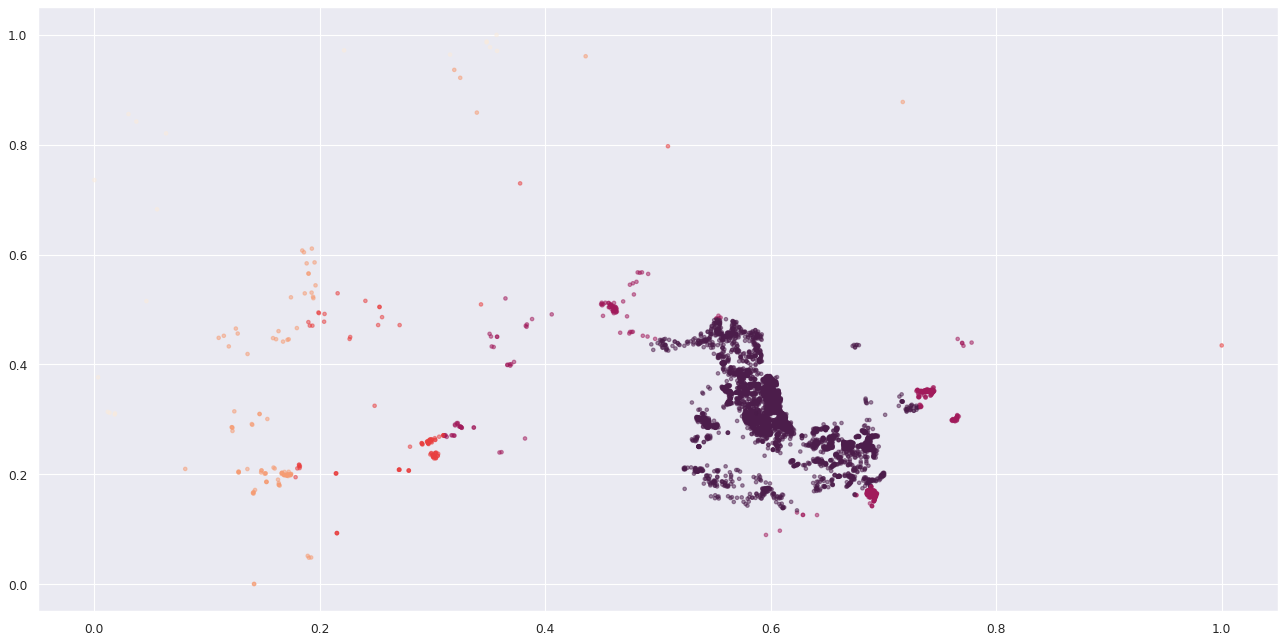

In [55]:
#ax =  df.scatter(x = 'latitude', y = 'longitude',style='o',c =A,figsize=(20, 20))
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x = df['latitude'], y = df['longitude'],c = list(df['distances']), alpha = 0.5, s = 10)

In [56]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y
  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [57]:
import time
start_time = time.time()
knn = KNNClassifier()
knn.fit(X1_train,y1_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00010752677917480469 seconds ---


In [58]:
start_time = time.time()
y1_hat = knn.predict(X1_validate,3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.18754196166992188 seconds ---


In [59]:

def accuracyKNN(y_validate,y_hat):
    return np.mean(y1_validate == y1_hat)

In [60]:
print(accuracyKNN(y1_validate ,y1_hat))


0.9879032258064516


In [61]:
class KNNRegressor():

  def fit(self,X,y):
    self.X = X
    self.y = y
  def predict(self,X,K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N) #empty y_hat same size as X

    #count everything within a certain distance
    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum() #normalized set of distance
      y_hat[i] = gamma_k.dot(self.y[idxt])
      
    return y_hat


In [62]:
knn = KNNRegressor()

In [63]:
knn.fit(X_train,y_train)

In [64]:
y_hat = knn.predict(X_test,1000, epsilon = 1e-5) #X1 = Test set (effectively)
#y_hat2 = knn.predict(X1,30, epsilon = 1e-3) #Larger K smoother curve smaller K risk overfitting
plt.figure(figsize=(12, 6))
# sns.swarmplot(X_test[:,0],y_hat)
# plt.title('Location versus Price')
# plt.xlim([10.0, 60.0])
#plt.ylim([-112,-110])
# plt.plot(X_train,y_hat, color = "#FF0070")
# plt.plot(X_train,y_hat2, color = "#00FF00")

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [65]:
def OLS(Y,Y_hat,N):
  return (1/(2*N))*np.sum((Y-Y_hat)**2)
def R2(Y,Y_hat):
  return (1 - (np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [66]:
R2(y_test, y_hat)

-0.6662926023231615

In [ ]:
class SimpleLinearReg():
    
    def fit(self,X,y):
        self.y=y
        self.d=np.mean(X**2)-np.mean(X)**2
        self.w0=(np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
        self.w1=(np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)    
    def predict(self,X,show=0):
        y_hat=self.w0+self.w1*X
        if show:
            plt.figure()
            plt.scatter(X,self.y,s=8)
            plt.plot(X,y_hat,color='#FF0070')
            
        return y_hat

In [ ]:
slr = SimpleLinearReg()

In [ ]:
slr.fit(X_train,y_train)

ValueError: ignored

In [67]:
class OURLinearRegression():
    
    def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False, lambd = 0, p = 1):
        epochs = int(epochs)
        N, D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        
        J = np.zeros(epochs)
        
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N)  #(lambd/p*N)*np.linalg.norm(self.W, ord=p, keepdims=True)
            self.W -= eta*(1/N)*(X.T@(Y_hat - Y)) # (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))
                    
         
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()        
    def predict(self, X):
        return X @ self.W

In [68]:
OLR = OURLinearRegression()

In [69]:
y_hat = OLR.predict(X_test) #X1 = Test set (effectively)


AttributeError: ignored

In [70]:
R2(y_test, y_hat)

-0.6662926023231615

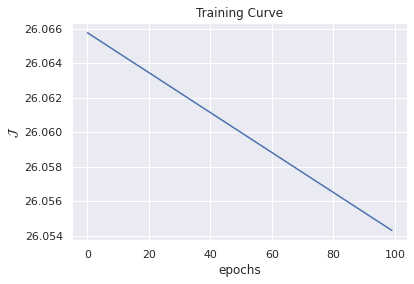

In [ ]:
OLR.fit(X_validate, y_validate, epochs = 1e2, eta = 1e-8, show_curve = True)